# Data load

## Import dataset

In [75]:
import os
import sys
#from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
import datetime

import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

from datetime import datetime
import numpy 

In [76]:
folder = "/Users/mariabelenalberti/Downloads/smart-meters-in-london/"
dataset_folder="daily_dataset/"

import glob
import pandas as pd

path = "/Users/mariabelenalberti/Downloads/smart-meters-in-london/daily_dataset"
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
daily_complete = pd.concat(dfs, ignore_index=True)
pd.to_datetime(daily_complete.day)

0         2011-12-07
1         2011-12-08
2         2011-12-09
3         2011-12-10
4         2011-12-11
5         2011-12-12
6         2011-12-13
7         2011-12-14
8         2011-12-15
9         2011-12-16
10        2011-12-17
11        2011-12-18
12        2011-12-19
13        2011-12-20
14        2011-12-21
15        2011-12-22
16        2011-12-23
17        2011-12-24
18        2011-12-25
19        2011-12-26
20        2011-12-27
21        2011-12-28
22        2011-12-29
23        2011-12-30
24        2011-12-31
25        2012-01-01
26        2012-01-02
27        2012-01-03
28        2012-01-04
29        2012-01-05
             ...    
3510403   2013-04-16
3510404   2013-04-17
3510405   2013-04-18
3510406   2013-04-19
3510407   2013-04-20
3510408   2013-04-21
3510409   2013-04-22
3510410   2013-04-23
3510411   2013-04-24
3510412   2013-04-25
3510413   2013-04-26
3510414   2013-04-27
3510415   2013-04-28
3510416   2013-04-29
3510417   2013-04-30
3510418   2013-05-01
3510419   201

In [77]:
daily_complete.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000027,2011-12-07,0.1470,0.159880,0.408,25,0.062123,3.997,0.103
1,MAC000027,2011-12-08,0.1705,0.193479,0.459,48,0.077042,9.287,0.105
2,MAC000027,2011-12-09,0.1440,0.156771,0.365,48,0.051995,7.525,0.101
3,MAC000027,2011-12-10,0.2415,0.264250,0.814,48,0.135007,12.684,0.101
4,MAC000027,2011-12-11,0.2785,0.288438,0.540,48,0.112697,13.845,0.126


In [ ]:
# Household information

In [78]:
folder = "/Users/mariabelenalberti/Downloads/smart-meters-in-london/"
filename = "informations_households.csv"
households = pd.read_csv(folder + filename)

In [79]:
households.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [80]:
#Merge

In [81]:
graph_dataframe = pd.merge(daily_complete, households, on='LCLid')

In [82]:
graph_dataframe.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3510433 entries, 0 to 3510432
Data columns (total 13 columns):
LCLid            object
day              object
energy_median    float64
energy_mean      float64
energy_max       float64
energy_count     int64
energy_std       float64
energy_sum       float64
energy_min       float64
stdorToU         object
Acorn            object
Acorn_grouped    object
file             object
dtypes: float64(6), int64(1), object(6)
memory usage: 375.0+ MB


In [83]:
graph_dataframe['day']= pd.to_datetime(graph_dataframe['day'],format = '%Y-%m-%d')

In [84]:
graph_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3510433 entries, 0 to 3510432
Data columns (total 13 columns):
LCLid            object
day              datetime64[ns]
energy_median    float64
energy_mean      float64
energy_max       float64
energy_count     int64
energy_std       float64
energy_sum       float64
energy_min       float64
stdorToU         object
Acorn            object
Acorn_grouped    object
file             object
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 375.0+ MB


In [85]:
graph_dataframe['month'] = pd.DatetimeIndex(graph_dataframe['day']).month

In [86]:
graph_dataframe.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,stdorToU,Acorn,Acorn_grouped,file,month
0,MAC000027,2011-12-07,0.1470,0.159880,0.408,25,0.062123,3.997,0.103,Std,ACORN-J,Comfortable,block_71,12
1,MAC000027,2011-12-08,0.1705,0.193479,0.459,48,0.077042,9.287,0.105,Std,ACORN-J,Comfortable,block_71,12
2,MAC000027,2011-12-09,0.1440,0.156771,0.365,48,0.051995,7.525,0.101,Std,ACORN-J,Comfortable,block_71,12
3,MAC000027,2011-12-10,0.2415,0.264250,0.814,48,0.135007,12.684,0.101,Std,ACORN-J,Comfortable,block_71,12
4,MAC000027,2011-12-11,0.2785,0.288438,0.540,48,0.112697,13.845,0.126,Std,ACORN-J,Comfortable,block_71,12


In [121]:
graph = graph_dataframe.groupby(by=['Acorn_grouped','month'],sort =False)['energy_sum'].mean().unstack(level=0)

In [122]:
graph

Acorn_grouped,Comfortable,Adversity,Affluent,ACORN-,ACORN-U
month,,,,,
12,11.981181,9.925933,13.926087,13.323662,14.139093
1,11.867165,9.896382,14.140512,8.572645,14.561239
2,11.476638,9.585557,13.595137,8.203643,13.827011
3,11.684465,9.759187,13.658552,NaN,15.260666
4,9.848121,8.585774,11.458217,6.943437,11.181900
5,8.691085,7.632033,9.990674,10.517267,9.586418
6,8.252019,7.269626,9.366113,12.109689,8.648065
7,8.205561,7.205554,8.857854,11.819204,8.383773
8,8.057627,7.095217,8.588027,11.403011,9.354863


In [123]:
folder = "/Users/mariabelenalberti/Downloads/smart-meters-in-london/"
filename = "weather_daily_darksky.csv"
weather = pd.read_csv(folder + filename)

In [124]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 32 columns):
temperatureMax                 882 non-null float64
temperatureMaxTime             882 non-null object
windBearing                    882 non-null int64
icon                           882 non-null object
dewPoint                       882 non-null float64
temperatureMinTime             882 non-null object
cloudCover                     881 non-null float64
windSpeed                      882 non-null float64
pressure                       882 non-null float64
apparentTemperatureMinTime     882 non-null object
apparentTemperatureHigh        882 non-null float64
precipType                     882 non-null object
visibility                     882 non-null float64
humidity                       882 non-null float64
apparentTemperatureHighTime    882 non-null object
apparentTemperatureLow         882 non-null float64
apparentTemperatureMax         882 non-null float64
uvIndex            

In [125]:
weather.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [126]:
weather['date']= pd.to_datetime(weather['temperatureMaxTime'],format = '%Y-%m-%d')

In [127]:
weather['month'] = pd.DatetimeIndex(weather['date']).month

In [135]:
weather_monthly = weather.groupby(by=['month'],sort =False,as_index=False)['temperatureMax'].mean()

In [136]:
test = pd.merge(weather_monthly,graph, on='month')

In [137]:
test

,month,temperatureMax,Comfortable,Adversity,Affluent,ACORN-,ACORN-U
0,11,11.128556,11.015730,9.202476,13.113910,14.579200,12.519671
1,12,9.094624,11.981181,9.925933,13.926087,13.323662,14.139093
2,5,16.287258,8.691085,7.632033,9.990674,10.517267,9.586418
3,7,22.818548,8.205561,7.205554,8.857854,11.819204,8.383773
4,9,18.712833,8.668641,7.489959,9.808937,11.619178,10.222900
5,1,8.287097,11.867165,9.896382,14.140512,8.572645,14.561239
6,4,12.317333,9.848121,8.585774,11.458217,6.943437,11.181900
7,2,7.760941,11.476638,9.585557,13.595137,8.203643,13.827011
8,8,22.680161,8.057627,7.095217,8.588027,11.403011,9.354863
9,3,11.161828,11.684465,9.759187,13.658552,NaN,15.260666


In [138]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

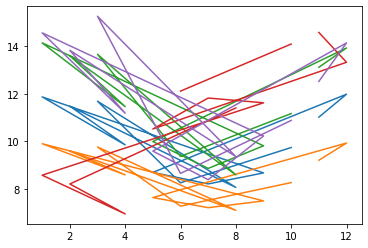

In [141]:
plt.plot( 'month', 'Comfortable', data= test)
plt.plot( 'month', 'Adversity', data= test)
plt.plot( 'month', 'Affluent', data= test)
plt.plot( 'month', 'ACORN-', data= test)
plt.plot( 'month', 'ACORN-U', data= test)
plt.show()

In [300]:
# TRIAL 2 TEMPERATURA

In [321]:
folder = "/Users/mariabelenalberti/Downloads/smart-meters-in-london/"
filename = "weather_hourly_darksky.csv"
df_weather = pd.read_csv(folder + filename)

In [322]:
df_weather = df_weather[['temperature', 'time']]
df_weather.columns = ['temperature', 'DateTime']
df_weather['DateTime'] = pd.to_datetime(df_weather['DateTime'])
df_weather['year'] = df_weather['DateTime'].dt.year
df_weather['month'] = df_weather['DateTime'].dt.month
df_weather['day'] = df_weather['DateTime'].dt.day


In [323]:
df_weather.head()

,temperature,DateTime,year,month,day
0,10.24,2011-11-11 00:00:00,2011,11,11
1,9.76,2011-11-11 01:00:00,2011,11,11
2,9.46,2011-11-11 02:00:00,2011,11,11
3,9.23,2011-11-11 03:00:00,2011,11,11
4,9.26,2011-11-11 04:00:00,2011,11,11


In [324]:
df_weather_2012 = df_weather[df_weather.year==2012][['temperature', 'month']]
df_weather_2013= df_weather[df_weather.year==2013][['temperature', 'month']]

In [325]:
df_weather = pd.concat([df_weather_2012, df_weather_2013],keys=['2012','2013'],names=['year'])

In [326]:
df_weather.head()
df_weather.tail()

temperature  month
year                          
2013 19001         4.97     12
     19002         4.83     12
     19003         4.32     12
     19004         3.27     12
     19005         2.86     12

In [327]:
df_weather = df_weather.groupby(by=['year','month'])['temperature'].mean().to_frame()

In [328]:
df_weather.reset_index(level=0, inplace=True)

In [329]:
df_weather

,year,temperature
month,,
1,2012,6.776707
2,2012,4.868534
3,2012,9.307433
4,2012,8.600569
5,2012,13.492755
6,2012,14.950514
7,2012,16.838038
8,2012,18.345605
9,2012,14.628125


In [330]:
#TRIAL 2 CONSUMO ACORN

In [355]:
folder = "/Users/mariabelenalberti/Downloads/smart-meters-in-london/"
dataset_folder="daily_dataset/"

import glob
import pandas as pd

path = "/Users/mariabelenalberti/Downloads/smart-meters-in-london/daily_dataset"
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
daily_complete = pd.concat(dfs, ignore_index=True)
pd.to_datetime(daily_complete.day)

0         2011-12-07
1         2011-12-08
2         2011-12-09
3         2011-12-10
4         2011-12-11
5         2011-12-12
6         2011-12-13
7         2011-12-14
8         2011-12-15
9         2011-12-16
10        2011-12-17
11        2011-12-18
12        2011-12-19
13        2011-12-20
14        2011-12-21
15        2011-12-22
16        2011-12-23
17        2011-12-24
18        2011-12-25
19        2011-12-26
20        2011-12-27
21        2011-12-28
22        2011-12-29
23        2011-12-30
24        2011-12-31
25        2012-01-01
26        2012-01-02
27        2012-01-03
28        2012-01-04
29        2012-01-05
             ...    
3510403   2013-04-16
3510404   2013-04-17
3510405   2013-04-18
3510406   2013-04-19
3510407   2013-04-20
3510408   2013-04-21
3510409   2013-04-22
3510410   2013-04-23
3510411   2013-04-24
3510412   2013-04-25
3510413   2013-04-26
3510414   2013-04-27
3510415   2013-04-28
3510416   2013-04-29
3510417   2013-04-30
3510418   2013-05-01
3510419   201

In [356]:
folder = "/Users/mariabelenalberti/Downloads/smart-meters-in-london/"
filename = "informations_households.csv"
households = pd.read_csv(folder + filename)

In [358]:
graph_dataframe = pd.merge(daily_complete, households, on='LCLid')

In [359]:
graph_dataframe['day']= pd.to_datetime(graph_dataframe['day'],format = '%Y-%m-%d')

In [360]:
graph_dataframe['year'] = pd.DatetimeIndex(graph_dataframe['day']).year
graph_dataframe['month'] = pd.DatetimeIndex(graph_dataframe['day']).month

In [361]:
graph_dataframe.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,stdorToU,Acorn,Acorn_grouped,file,year,month
0,MAC000027,2011-12-07,0.1470,0.159880,0.408,25,0.062123,3.997,0.103,Std,ACORN-J,Comfortable,block_71,2011,12
1,MAC000027,2011-12-08,0.1705,0.193479,0.459,48,0.077042,9.287,0.105,Std,ACORN-J,Comfortable,block_71,2011,12
2,MAC000027,2011-12-09,0.1440,0.156771,0.365,48,0.051995,7.525,0.101,Std,ACORN-J,Comfortable,block_71,2011,12
3,MAC000027,2011-12-10,0.2415,0.264250,0.814,48,0.135007,12.684,0.101,Std,ACORN-J,Comfortable,block_71,2011,12
4,MAC000027,2011-12-11,0.2785,0.288438,0.540,48,0.112697,13.845,0.126,Std,ACORN-J,Comfortable,block_71,2011,12


In [372]:
graph_dataframe_2012 = graph_dataframe[graph_dataframe.year==2012][['LCLid','Acorn_grouped', 'energy_sum','month','year']]
graph_dataframe_2013 = graph_dataframe[graph_dataframe.year==2013][['LCLid','Acorn_grouped', 'energy_sum','month','year']]

In [378]:
df_energy = pd.concat([graph_dataframe_2012,graph_dataframe_2013],keys=['2012','2013'],names=['year'],ignore_index=True)

In [382]:
df_energy.head()

,LCLid,year,month,energy_sum
0,MAC000027,2012,1,9.017548
1,MAC000027,2012,2,10.147172
2,MAC000027,2012,3,9.847129
3,MAC000027,2012,4,9.659267
4,MAC000027,2012,5,9.167677


In [380]:
df_energy = df_energy.groupby(by=['LCLid','year','month'],sort =False,as_index=False)['energy_sum'].mean()

In [381]:
df_energy

,LCLid,year,month,energy_sum
0,MAC000027,2012,1,9.017548
1,MAC000027,2012,2,10.147172
2,MAC000027,2012,3,9.847129
3,MAC000027,2012,4,9.659267
4,MAC000027,2012,5,9.167677
5,MAC000027,2012,6,8.254700
6,MAC000027,2012,7,9.578194
7,MAC000027,2012,8,9.310290
8,MAC000027,2012,9,8.739000
9,MAC000027,2012,10,8.949323


In [346]:
# MERGE = energy + temp

In [383]:
test = pd.merge(df_energy,df_weather, on=['year','month'])

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat